# Voter separation


In [69]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display
from importlib import reload
import sys
from IPython.display import *
sys.path.append("..")
from src import vote_utils as vu
from src import dissimilarity_analysis as da

# vu = reload(vu)
# da = reload(da)
%matplotlib inline

  0%|          | 0/1216 [00:00<?, ?it/s]

dict_keys(['df_data_boxes', 'df_data', 'fig'])

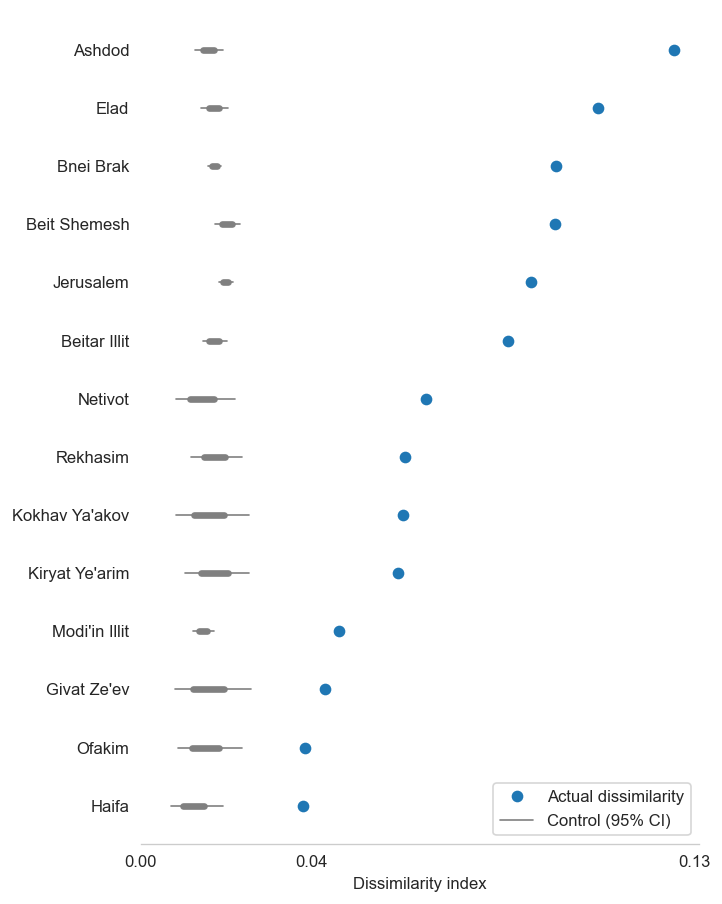

In [51]:
dct = da.main(knesset_numbers=25)
df_data = dct["df_data"]
dct.keys()

In [52]:
df_data.head()

,knesset_number,city_code,city_name,n_boxes,n_voters,n_legal,n_relevant_boxes,n_relevant_voters,n_relevant_legal,city_ref_ratio,city_ratios,dissimilarity,dissimilarity_simulation,simulation_fraction,y_city,y,n_haredi_population,fraction_haredim,fraction_haredim_of_jewish_population,fraction_of_total_haredim_in_israel
0,25,70,Ashdod,302,181784,116294,30,18030,15277,0.373512,"[4.488636363636363, 0.4025974025974026, 0.7676...",0.125230,"[0.01527907957222569, 0.018130002531751677, 0....",0.0,13,13,48626,0.214,0.241661,0.040902
1,25,1309,Elad,39,23395,19637,36,21709,18231,1.383255,"[3.8472222222222223, 3.7157894736842105, 1.848...",0.107391,"[0.01826163591904974, 0.018903459359993095, 0....",0.0,12,12,46058,0.931,0.930954,0.038742
2,25,6100,Bnei Brak,187,115586,87692,170,105609,80933,0.471433,"[1.9333333333333333, 1.5033557046979866, 1.215...",0.097446,"[0.01610850067168093, 0.01750792339542543, 0.0...",0.0,11,11,202959,0.929,0.935351,0.170718
3,25,2610,Beit Shemesh,133,78064,51275,63,37283,23530,0.436247,"[1.1104294478527608, 0.6784140969162996, 0.848...",0.097357,"[0.02248423844353678, 0.021511334993923385, 0....",0.0,10,10,115398,0.746,0.755351,0.097067
4,25,3000,Jerusalem,706,432125,264700,202,123662,79019,0.490935,"[0.41132075471698115, 0.7129186602870813, 0.90...",0.091785,"[0.022464735465261593, 0.01963781403089384, 0....",0.0,9,9,290090,0.295,0.499097,0.244008


In [53]:
df_data_boxes = dct["df_data_boxes"]
df_data_boxes.head()

,city_name,city_code,ballot_code,can_vote,voted,void,legal,party_avoda,party_bayit_yehudi,party_agudat_israel,party_kahol_lavan,party_israel_beitenu,party_likud,party_meretz,party_raam,party_yesh_atid,party_shas,knesset_number
0,אבו גווייעד שבט,967,3.1,570,173,4,169,0,0,0,1,0,9,0,132,0,0,25
1,אבו גווייעד שבט,967,3.2,570,96,1,95,1,0,0,0,0,1,0,90,0,0,25
2,אבו גווייעד שבט,967,3.3,570,169,1,168,0,0,0,3,0,0,0,150,1,2,25
3,אבו גווייעד שבט,967,3.4,569,111,3,108,0,0,0,1,0,2,0,96,0,2,25
4,אבו גוש,472,1.1,598,360,7,353,1,0,0,0,0,11,10,110,5,0,25


In [54]:
sel_homogenic = vu.is_homogenic(df_data_boxes)
sel_at_least_10_aguda = df_data_boxes.party_agudat_israel > 10
sel_not_too_many_shas = (df_data_boxes.party_shas + 1) / (
    df_data_boxes.party_agudat_israel + 1
) < 8
df_sels = pd.DataFrame(
    {
        "homogenic": sel_homogenic,
        "at_least_10_aguda": sel_at_least_10_aguda,
        "not_too_many_shas": sel_not_too_many_shas,
    }
)
df_sels.head()

,homogenic,at_least_10_aguda,not_too_many_shas
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True


In [55]:
np.where(sel_homogenic)[0]

array([  189,   190,   193,   200,   211,   494,   495,   496,   497,
         499,   500,   501,   502,   503,   504,   505,   506,   507,
         508,   509,   510,   511,   512,   513,   514,   515,   516,
         517,   518,   519,   520,   521,   522,   523,   525,   526,
         527,   528,   529,   530,   532,   669,   678,   700,   702,
         817,   818,   819,   820,   821,   822,   840,   841,   842,
         843,   881,   882,   883,   884,   889,   918,   919,   920,
         921,   922,   923,   928,   929,   930,   931,   932,  1604,
        1660,  1661,  1662,  1663,  1664,  1674,  1675,  1676,  1680,
        1681,  1682,  1683,  1684,  1685,  1686,  1687,  1688,  1689,
        1690,  1691,  1692,  1693,  1694,  1695,  1696,  1697,  1698,
        1699,  1706,  1707,  1708,  1709,  1710,  1712,  1713,  1714,
        1716,  1717,  1718,  1719,  1723,  1724,  1725,  1726,  1727,
        1728,  1729,  1731,  1732,  1733,  1735,  1736,  1737,  1738,
        1739,  1740,

In [56]:
# venn diagram
from matplotlib_venn import venn2

In [57]:
def make_venn(a, b, name_a, name_b):
    s_a = set(np.where(a)[0])
    s_b = set(np.where(b)[0])
    return venn2((s_a, s_b), set_labels=(name_a, name_b))

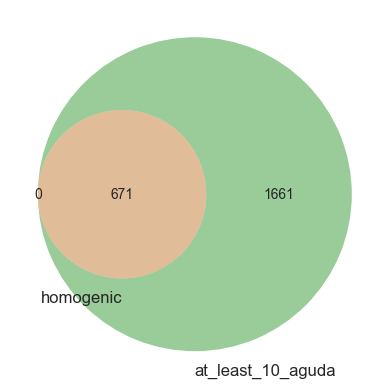

In [58]:
make_venn(sel_homogenic, sel_at_least_10_aguda, "homogenic", "at_least_10_aguda")

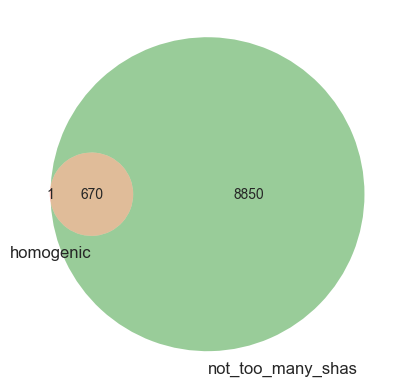

In [59]:
make_venn(sel_homogenic, sel_not_too_many_shas, "homogenic", "not_too_many_shas")

In [60]:
sel_haredi = sel_homogenic & sel_at_least_10_aguda & sel_not_too_many_shas
df_haredi_boxes = df_data_boxes.loc[sel_haredi]
df_haredi_boxes

,city_name,city_code,ballot_code,can_vote,voted,void,legal,party_avoda,party_bayit_yehudi,party_agudat_israel,party_kahol_lavan,party_israel_beitenu,party_likud,party_meretz,party_raam,party_yesh_atid,party_shas,knesset_number
189,אופקים,31,11.0,657,533,3,530,0,1,285,0,2,43,1,0,1,169,25
190,אופקים,31,12.0,698,559,5,554,0,0,220,2,6,42,0,1,1,262,25
193,אופקים,31,15.2,641,500,4,496,2,2,222,4,11,51,0,0,6,169,25
200,אופקים,31,20.0,663,577,4,573,0,0,275,3,1,48,0,0,5,205,25
211,אופקים,31,33.0,515,422,7,415,0,0,214,0,4,25,0,0,4,154,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10935,רכסים,922,9.0,552,471,1,470,1,0,204,0,2,21,0,0,2,222,25
10936,רכסים,922,10.0,550,465,1,464,1,0,195,5,0,21,2,0,5,200,25
11762,תל אביב יפו,5000,21.0,655,592,1,591,2,0,479,6,2,9,2,1,11,64,25
12535,תפרח,709,1.0,549,480,3,477,0,0,337,2,0,23,3,0,1,89,25


In [170]:
df_turnout = df_haredi_boxes[["city_name", "city_code", "can_vote", "legal"]].copy()
df_turnout["turnout"] = df_turnout.legal / df_turnout.can_vote * 100

bins = [0, 25, 50, 75, 100]
labels = ["0-25%", "25-50%", "50-75%", "75-100%"]
df_turnout["turnout_cat"] = pd.cut(df_turnout.turnout, bins=bins, labels=labels)
df_turnout.dtypes

city_name        object
city_code        object
can_vote          int64
legal             int64
turnout         float64
turnout_cat    category
dtype: object

In [171]:
df_city_sizes = (
    df_turnout.groupby("city_name")["can_vote"].sum().sort_values(ascending=False)
)
df_city_sizes

city_name
ירושלים          123662
בני ברק          105609
בית שמש           37283
מודיעין עילית     32933
ביתר עילית        29318
אלעד              21140
אשדוד             18030
רכסים              6974
נתיבות             3803
קרית יערים         3496
אופקים             3174
חיפה               2893
כוכב יעקב          2863
גבעת זאב           2598
לוד                2397
צפת                1564
טבריה              1324
עמנואל             1316
תפרח               1082
נוף הגליל           770
פתח תקווה           677
תל אביב  יפו        655
קרית גת             596
מתתיהו              521
נתניה               503
בית חלקיה           484
יסודות              352
קוממיות             258
Name: can_vote, dtype: int64

In [172]:
from bidi.algorithm import get_display

In [173]:
def make_agg(df):
    ret = {
        "can_vote": df.can_vote.sum(),
        "boxes": df.shape[0],
    }
    return pd.Series(ret)

def summarize_turnout(df):
    df_groups_counts = (
        df.groupby("turnout_cat", observed=True)
        .apply(make_agg, include_groups=False)
        .rename(
            columns={
                "can_vote": "מתוך בעלי זכות בחירה",
                "boxes": "מתוך קלפיות",
            }
        )
    ).rename_axis("אחוז הצבעה")
    # ensure we have all the categories from turnout_cat, if not, add them with 0
    df_groups_counts = df_groups_counts.reindex(labels, fill_value=0)
    
    df_groups_perc = (df_groups_counts / df_groups_counts.sum() * 100).round(2).loc[labels]
    return df_groups_perc


In [174]:
display(Markdown("## סיכום הצבעה"))
display(summarize_turnout(df_turnout))
turnout_summaries = {'overall': summarize_turnout(df_turnout)}
for city_name in df_city_sizes.head(5).index:
    sel_city = df_turnout.city_name == city_name
    turnout_summaries[city_name] = summarize_turnout(df_turnout.loc[sel_city])
    display(Markdown(f"## {city_name}"))
    display(turnout_summaries[city_name])

## סיכום הצבעה

,מתוך בעלי זכות בחירה,מתוך קלפיות
אחוז הצבעה,,
0-25%,1.45,1.49
25-50%,5.61,5.37
50-75%,34.28,34.48
75-100%,58.66,58.66


## ירושלים

,מתוך בעלי זכות בחירה,מתוך קלפיות
אחוז הצבעה,,
0-25%,2.44,2.48
25-50%,12.57,12.38
50-75%,64.95,64.85
75-100%,20.04,20.30


## בני ברק

,מתוך בעלי זכות בחירה,מתוך קלפיות
אחוז הצבעה,,
0-25%,0.00,0.00
25-50%,1.12,1.18
50-75%,29.94,30.00
75-100%,68.94,68.82


## בית שמש

,מתוך בעלי זכות בחירה,מתוך קלפיות
אחוז הצבעה,,
0-25%,7.74,7.94
25-50%,16.23,14.29
50-75%,43.35,44.44
75-100%,32.69,33.33


## מודיעין עילית

,מתוך בעלי זכות בחירה,מתוך קלפיות
אחוז הצבעה,,
0-25%,0.00,0.00
25-50%,0.00,0.00
50-75%,2.06,1.89
75-100%,97.94,98.11


## ביתר עילית

,מתוך בעלי זכות בחירה,מתוך קלפיות
אחוז הצבעה,,
0-25%,0.00,0.00
25-50%,0.00,0.00
50-75%,3.58,4.08
75-100%,96.42,95.92


In [175]:
n_cities = 5
df_turnout_summary = []
for k, v in turnout_summaries.items():
    v['city_name'] = k
    df_turnout_summary.append(v)
df_turnout_summary = pd.concat(df_turnout_summary)


In [176]:
def plot_turnout_cities(
    df_turnout_summary,
    turnout_column='מתוך קלפיות',
    xlabel_text='מתוך קלפיות',
    axis_title='',
    turnout_label='0-25%',
    overall_city_name='overall'
):
    """
    Plot a horizontal bar chart for cities with low voter turnout.

    Args:
        df_turnout_summary (pd.DataFrame): DataFrame containing turnout summary data.
        turnout_column (str): The column to plot, e.g., 'מתוך קלפיות'.
        xlabel_text (str): The x-axis label text.
        axis_title (str): The title of the plot.
        low_turnout_label (str, optional): Label for low-turnout cities in the DataFrame index. Default is '0-25%'.
        overall_city_name (str, optional): Name of the overall city row in the DataFrame. Default is 'overall'.
    """
    # Filter and sort DataFrame for low-turnout cities
    df_curr = df_turnout_summary.loc[turnout_label].sort_values(turnout_column, ascending=True)
    
    # Split into overall and rest
    sel_overall = df_curr.city_name == overall_city_name
    df_overall = df_curr.loc[sel_overall]
    df_rest = df_curr.loc[~sel_overall]
    
    # Plot setup
    fig, ax = plt.subplots()
    y = np.arange(df_rest.shape[0])  # Bar positions
    x = df_rest[turnout_column]     # Bar widths
    
    # Bar plot
    ax.barh(y=y, width=x)
    
    # Add labels
    labels = []
    for yy, xx in zip(y, x):
        curr_city = df_rest.iloc[yy].city_name
        labels.append(get_display(curr_city))
        ax.text(xx, yy, f'{xx:.1f}', va='center', ha='left')
    
    ax.set_yticks(y)
    ax.set_yticklabels(labels)
    
    # Add overall line
    overall_value = df_overall[turnout_column].values[0]
    ax.axvline(overall_value, color='red', linestyle='--')
    ax.text(overall_value, 0, get_display('הממוצע'), va='top', ha='right')
    
    # Add x-axis ticks and label
    ax.set_xticks([0, overall_value, max(x)])
    ax.set_xlabel(get_display(xlabel_text))
    
    # Set title and grid
    sns.despine()
    ax.grid(axis='x')
    ax.set_title(get_display(axis_title))
    return ax
    

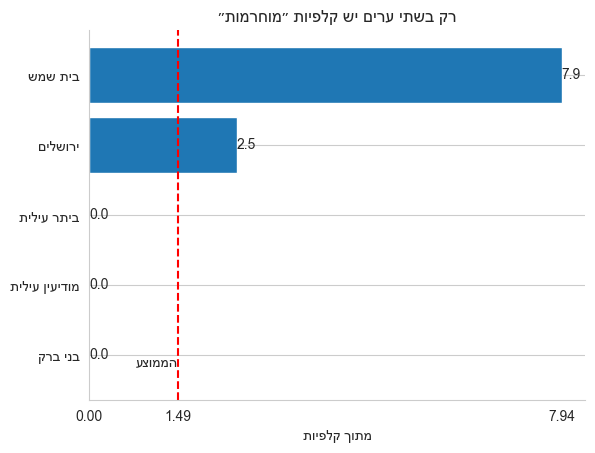

In [177]:
ax = plot_turnout_cities(df_turnout_summary, axis_title='רק בשתי ערים יש קלפיות ״מוחרמות״')

<Axes: title={'center': 'הצופנ העפות - ״תוסייוגמ״ תויפלק'}, xlabel='תויפלק ךותמ'>

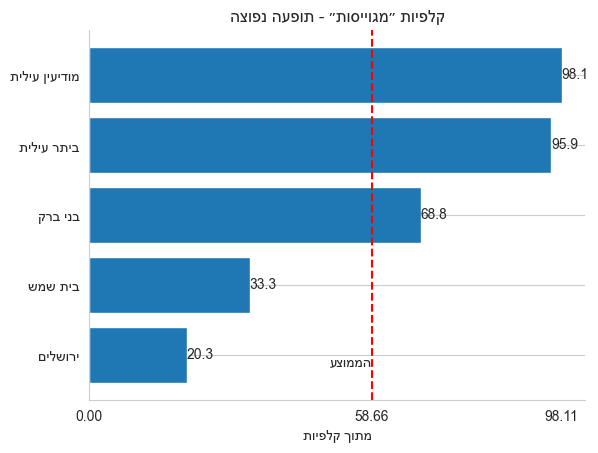

In [178]:
plot_turnout_cities(df_turnout_summary, turnout_label='75-100%', axis_title='קלפיות ״מגוייסות״ - תופעה נפוצה')